In [1]:
from marubatsu import BitBoard

def __init__(self, board_size=3, count_linemark=False):
    self.BOARD_SIZE = board_size
    self.bit_length = self.BOARD_SIZE ** 2
    self.count_linemark = count_linemark

    self.colmasks = []
    self.rowmasks = []
    self.diamask1 = 0
    self.diamask2 = 0
    for i in range(self.BOARD_SIZE):
        colmask = 0
        rowmask = 0
        for j in range(self.BOARD_SIZE):
            colmask |= self.xy_to_move(i, j)
            rowmask |= self.xy_to_move(j, i)
        self.colmasks.append(colmask)
        self.rowmasks.append(rowmask)
        self.diamask1 |= self.xy_to_move(i, i)
        self.diamask2 |= self.xy_to_move(i, self.BOARD_SIZE - i - 1)

    self.board = [0, 0]
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }    
        
BitBoard.__init__ = __init__

In [2]:
bb = BitBoard()
print("colmasks")
for colmask in bb.colmasks:
    print(f"0b{colmask:09b}")
print("rowmasks")
for rowmask in bb.rowmasks:
    print(f"0b{rowmask:09b}")
print(f"diamask1 0b{bb.diamask1:09b}")
print(f"diamask2 0b{bb.diamask2:09b}")

colmasks
0b000000111
0b000111000
0b111000000
rowmasks
0b001001001
0b010010010
0b100100100
diamask1 0b100010001
diamask2 0b001010100


In [3]:
bb = BitBoard(board_size=4)
print("colmasks")
for colmask in bb.colmasks:
    print(f"0b{colmask:016b}")
print("rowmasks")
for rowmask in bb.rowmasks:
    print(f"0b{rowmask:016b}")
print(f"diamask1 0b{bb.diamask1:016b}")
print(f"diamask2 0b{bb.diamask2:016b}")

colmasks
0b0000000000001111
0b0000000011110000
0b0000111100000000
0b1111000000000000
rowmasks
0b0001000100010001
0b0010001000100010
0b0100010001000100
0b1000100010001000
diamask1 0b1000010000100001
diamask2 0b0001001001001000


In [4]:
def __init__(self, board_size=3, count_linemark=False):
    self.BOARD_SIZE = board_size
    self.bit_length = self.BOARD_SIZE ** 2
    self.count_linemark = count_linemark

    self.colmasks = []
    self.rowmasks = []
    self.diamask1 = 0
    self.diamask2 = 0
    for i in range(self.BOARD_SIZE):
        colmask = 0
        rowmask = 0
        for j in range(self.BOARD_SIZE):
            colmask |= self.xy_to_move(i, j)
            rowmask |= self.xy_to_move(j, i)
        self.colmasks.append(colmask)
        self.rowmasks.append(rowmask)
        self.diamask1 |= self.xy_to_move(i, i)
        self.diamask2 |= self.xy_to_move(i, self.BOARD_SIZE - i - 1)
        
    self.initialize()
        
BitBoard.__init__ = __init__

In [5]:
def initialize(self):
    self.board = [0, 0]
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }  
            
BitBoard.initialize = initialize

In [6]:
from marubatsu import Marubatsu

def __init__(self, boardclass=None, board_size=3, *args, **kwargs):
    if boardclass is None:
        boardclass = ListBoard
    # ゲーム盤のデータ構造を定義するクラス
    self.boardclass = boardclass
    # ゲーム盤の縦横のサイズ
    self.BOARD_SIZE = board_size
    # boardclass のパラメータ
    self.args = args
    self.kwargs = kwargs
    self.board = self.boardclass(self.BOARD_SIZE, *self.args, **self.kwargs)
    self.EMPTY = self.board.EMPTY
    self.CIRCLE = self.board.CIRCLE
    self.CROSS = self.board.CROSS
    # 〇×ゲーム盤を再起動するメソッドを呼び出す
    self.restart()
    
Marubatsu.__init__ = __init__

In [7]:
def restart(self):
    self.board.initialize()
    self.turn = self.CIRCLE     
    self.move_count = 0
    self.status = self.PLAYING
    self.last_move = -1, -1          
    self.last_turn = self.CROSS
    self.records = [self.last_move]
    
Marubatsu.restart = restart  

In [8]:
def is_winner(self, player, last_move):
    x, y = self.move_to_xy(last_move)
    if self.count_linemark:
        if self.rowcount[player][y] == self.BOARD_SIZE or \
        self.colcount[player][x] == self.BOARD_SIZE:
            return True
        # 左上から右下方向の判定
        if x == y and self.diacount[player][0] == self.BOARD_SIZE:
            return True
        # 右上から左下方向の判定
        if x + y == self.BOARD_SIZE - 1 and \
            self.diacount[player][1] == self.BOARD_SIZE:
            return True
    else:
        colmask = self.colmasks[x]
        rowmask = self.rowmasks[y]
        board = self.board[player]
        if board & colmask == colmask or board & rowmask == rowmask:
            return True
        # 左上から右下方向の判定
        if x == y and board & self.diamask1 == self.diamask1:
            return True
        # 右上から左下方向の判定
        if x + y == self.BOARD_SIZE - 1 and board & self.diamask2 == self.diamask2:
            return True
    
    # どの一直線上にも配置されていない場合は、player は勝利していないので False を返す
    return False     

BitBoard.is_winner = is_winner

In [9]:
from mbtest import test_judge

test_judge(mbparams={"boardclass": BitBoard})

Start
test winner = playing
oooooooooo
test winner = 0
ooooooooo
test winner = 1
oooooooo
test winner = draw
o
Finished


In [10]:
# 列方向の 〇 の勝利
movelist = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0)]
mb = Marubatsu(boardclass=BitBoard, board_size=4)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)

# 行方向の × の勝利
movelist = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (0, 2), (3, 1)]
mb = Marubatsu(boardclass=BitBoard, board_size=4)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)

# 対角線方向の 〇 の勝利
movelist = [(0, 0), (0, 1), (1, 1), (1, 0), (2, 2), (2, 0), (3, 3)]
mb = Marubatsu(boardclass=BitBoard, board_size=4)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)

winner o
oooO
xxx.
....
....

winner x
ooo.
xxxX
o...
....

winner o
oxx.
xo..
..o.
...O



In [11]:
def __init__(self, board_size=3, count_linemark=False):
    self.BOARD_SIZE = board_size
    self.bit_length = self.BOARD_SIZE ** 2
    self.count_linemark = count_linemark

    # 参照テーブルの計算
    self.fullmask = (1 << (self.BOARD_SIZE ** 2)) - 1
    self.colmasks = []
    self.rowmasks = []
    self.diamask1 = 0
    self.diamask2 = 0
    for i in range(self.BOARD_SIZE):
        colmask = 0
        rowmask = 0
        for j in range(self.BOARD_SIZE):
            colmask |= self.xy_to_move(i, j)
            rowmask |= self.xy_to_move(j, i)
        self.colmasks.append(colmask)
        self.rowmasks.append(rowmask)
        self.diamask1 |= self.xy_to_move(i, i)
        self.diamask2 |= self.xy_to_move(i, self.BOARD_SIZE - i - 1)
            
    self.initialize()
        
BitBoard.__init__ = __init__

In [12]:
bb = BitBoard()
print(bin(bb.fullmask))
bb = BitBoard(board_size=4)
print(bin(bb.fullmask))

0b111111111
0b1111111111111111


In [13]:
def calc_legal_moves(self):
    # マークが配置されているマスのビットが 1 になるビットボードを計算する
    board = self.board[0] | self.board[1]
    # 空のマスのビットが 1 になるビットボードを計算する
    board = self.fullmask - board
    legal_moves = []
    # board が 0 になるまで繰り返し処理を行う
    while board:
        # 次の合法手である LOB を計算する
        move = board & (-board)
        legal_moves.append(move)
        # board の RSB を 0 にして move のデータを削除する
        board -= move

    return legal_moves

BitBoard.calc_legal_moves = calc_legal_moves

In [14]:
movelist = [(0, 0), (0, 1), (1, 1), (2, 1)]
# 3 x 3 のゲーム盤の場合
print("3 x 3")
mb = Marubatsu(boardclass=BitBoard)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)
legal_moves = mb.calc_legal_moves()
for move in legal_moves:
    x, y = mb.board.move_to_xy(move)
    print(x, y)
print()

# 4 x 4 のゲーム盤の場合
print("4 x 4")
mb = Marubatsu(boardclass=BitBoard, board_size=4)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)
legal_moves = mb.calc_legal_moves()
for move in legal_moves:
    x, y = mb.board.move_to_xy(move)
    print(x, y)

3 x 3
Turn o
o..
xoX
...

0 2
1 0
1 2
2 0
2 2

4 x 4
Turn o
o...
xoX.
....
....

0 2
0 3
1 0
1 2
1 3
2 0
2 2
2 3
3 0
3 1
3 2
3 3


In [15]:
from ai import ai2, ai_match
import random

boardclass = BitBoard
for count_linemark in [False, True]:
    print(f"boardclass: {boardclass.__name__}, count_linemark {count_linemark}")
    random.seed(0)
    ai_match(ai=[ai2, ai2], match_num=50000, mbparams={"boardclass": boardclass, "count_linemark": count_linemark})

boardclass: BitBoard, count_linemark False
ai2 VS ai2


100%|██████████| 50000/50000 [00:02<00:00, 21328.21it/s]


count     win    lose    draw
o       29454   14352    6194
x       14208   29592    6200
total   43662   43944   12394

ratio     win    lose    draw
o       58.9%   28.7%   12.4%
x       28.4%   59.2%   12.4%
total   43.7%   43.9%   12.4%

boardclass: BitBoard, count_linemark True
ai2 VS ai2


100%|██████████| 50000/50000 [00:03<00:00, 15904.61it/s]

count     win    lose    draw
o       29454   14352    6194
x       14208   29592    6200
total   43662   43944   12394

ratio     win    lose    draw
o       58.9%   28.7%   12.4%
x       28.4%   59.2%   12.4%
total   43.7%   43.9%   12.4%



In [16]:
def __init__(self, board_size=3, count_linemark=False):
    self.BOARD_SIZE = board_size
    self.bit_length = self.BOARD_SIZE ** 2
    self.count_linemark = count_linemark

    # 参照テーブルの計算
    self.fullmask = (1 << self.BOARD_SIZE ** 2) - 1
    self.colmasks = []
    self.rowmasks = []
    self.diamask1 = 0
    self.diamask2 = 0
    for i in range(self.BOARD_SIZE):
        colmask = 0
        rowmask = 0
        for j in range(self.BOARD_SIZE):
            colmask |= self.xy_to_move(i, j)
            rowmask |= self.xy_to_move(j, i)
        self.colmasks.append(colmask)
        self.rowmasks.append(rowmask)
        self.diamask1 |= self.xy_to_move(i, i)
        self.diamask2 |= self.xy_to_move(i, self.BOARD_SIZE - i - 1)
    self.masklist = self.colmasks + self.rowmasks + [self.diamask1, self.diamask2]
            
    self.initialize()
        
BitBoard.__init__ = __init__

In [17]:
from collections import defaultdict

def count_markpats(self, turn, last_turn):
    markpats = defaultdict(int)

    if self.count_linemark:
        for countdict in [self.rowcount, self.colcount, self.diacount]:
            for circlecount, crosscount in zip(countdict[self.CIRCLE], countdict[self.CROSS]):
                emptycount = self.BOARD_SIZE - circlecount - crosscount
                if last_turn == self.CIRCLE:
                    markpats[(circlecount, crosscount, emptycount)] += 1
                else:
                    markpats[(crosscount, circlecount, emptycount)] += 1
    else:
        for mask in self.masklist:
            turncount = (self.board[turn] & mask).bit_count()
            lastturncount = (self.board[last_turn] & mask).bit_count()
            emptycount = self.BOARD_SIZE - turncount - lastturncount
            markpats[(lastturncount, turncount, emptycount)] += 1

    return markpats    

BitBoard.count_markpats = count_markpats

In [18]:
from pprint import pprint

movelist = [(0, 0), (0, 1), (1, 1), (2, 1)]
# 3 x 3 のゲーム盤の場合
print("3 x 3")
mb = Marubatsu(boardclass=BitBoard)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)
pprint(mb.count_markpats())
print()

# 4 x 4 のゲーム盤の場合
print("4 x 4")
mb = Marubatsu(boardclass=BitBoard, board_size=4)
for x, y in movelist:
    mb.cmove(x, y)
print(mb)
pprint(mb.count_markpats())

3 x 3
Turn o
o..
xoX
...

defaultdict(<class 'int'>,
            {(0, 0, 3): 1,
             (0, 1, 2): 3,
             (0, 2, 1): 1,
             (1, 0, 2): 1,
             (1, 1, 1): 1,
             (2, 1, 0): 1})

4 x 4
Turn o
o...
xoX.
....
....

defaultdict(<class 'int'>,
            {(0, 0, 4): 3,
             (0, 1, 3): 2,
             (0, 2, 2): 1,
             (1, 0, 3): 2,
             (1, 1, 2): 1,
             (2, 1, 1): 1})


In [19]:
from ai import ai14s
import random

boardclass = BitBoard
for count_linemark in [False, True]:
    print(f"boardclass: {boardclass.__name__}, count_linemark {count_linemark}")
    random.seed(0)
    ai_match(ai=[ai14s, ai2], match_num=50000, mbparams={"boardclass": boardclass, "count_linemark": count_linemark})

boardclass: BitBoard, count_linemark False
ai14s VS ai2


100%|██████████| 50000/50000 [00:17<00:00, 2820.79it/s]


count     win    lose    draw
o       49490       0     510
x       44103       0    5897
total   93593       0    6407

ratio     win    lose    draw
o       99.0%    0.0%    1.0%
x       88.2%    0.0%   11.8%
total   93.6%    0.0%    6.4%

boardclass: BitBoard, count_linemark True
ai14s VS ai2


100%|██████████| 50000/50000 [00:23<00:00, 2157.09it/s]

count     win    lose    draw
o       49490       0     510
x       44103       0    5897
total   93593       0    6407

ratio     win    lose    draw
o       99.0%    0.0%    1.0%
x       88.2%    0.0%   11.8%
total   93.6%    0.0%    6.4%



In [20]:
from abc import abstractmethod
from array import array
import numpy as np
from marubatsu import Board, ListBoard, List1dBoard, ArrayBoard, NpBoard, \
                      NpIntBoard, NpBoolBoard, BitBoard3x3

@abstractmethod
def initialize(self):
    pass

Board.initialize = initialize

def __init__(self, board_size=3, count_linemark=False):
    self.BOARD_SIZE = board_size
    self.count_linemark = count_linemark
    self.initialize()
    
ListBoard.__init__ = __init__
List1dBoard.__init__ = __init__
ArrayBoard.__init__ = __init__
NpBoard.__init__ = __init__
NpIntBoard.__init__ = __init__
NpBoolBoard.__init__ = __init__

def __init__(self, *args, **kwargs):
    self.BOARD_SIZE = 3
    self.bit_length = 9
    self.initialize()
    
BitBoard3x3.__init__ = __init__

def initialize(self):
    self.board = [[self.EMPTY] * self.BOARD_SIZE for y in range(self.BOARD_SIZE)]
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }
        
ListBoard.initialize = initialize

def initialize(self):
    self.board = [self.EMPTY] * (self.BOARD_SIZE ** 2)
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }
        
List1dBoard.initialize = initialize

def initialize(self):
    self.board = array("w", [self.EMPTY] * (self.BOARD_SIZE ** 2))
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }
        
ArrayBoard.initialize = initialize

def initialize(self):
    self.board = np.full((self.BOARD_SIZE, self.BOARD_SIZE), self.EMPTY)
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }
        
NpBoard.initialize = initialize

def initialize(self):
    self.board = np.full((2, self.BOARD_SIZE, self.BOARD_SIZE), False)
    if self.count_linemark:
        self.rowcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.colcount = {
            self.CIRCLE: [0] * self.BOARD_SIZE,
            self.CROSS: [0] * self.BOARD_SIZE,
        }
        self.diacount = {
            self.CIRCLE: [0] * 2,
            self.CROSS: [0] * 2,
        }
        
NpBoolBoard.initialize = initialize

def initialize(self):
    self.board = [0, 0]

BitBoard3x3.initialize = initialize

In [21]:
for board_size in [3, 5, 10, 50, 100]:
    for boardclass in [ListBoard, List1dBoard, ArrayBoard, NpBoard, NpIntBoard, 
                       NpBoolBoard, BitBoard, BitBoard3x3]:
        if board_size != 3 and boardclass == BitBoard3x3:
            continue
        print(f"board size = {board_size} boardclass: {boardclass.__name__}")
        mb = Marubatsu(boardclass=boardclass, board_size=board_size)
        for i in range(board_size - 1):
            mb.cmove(i, 0)
            mb.cmove(i, 1)
        move = mb.board.xy_to_move(0, 0)
        print("setmark_by_move")
        %timeit mb.board.setmark_by_move(move, mb.CIRCLE)
        print("getmark_by_move")
        %timeit mb.board.getmark_by_move(move)
        print("calc_legal_moves")
        %timeit mb.calc_legal_moves()
        print("judge")
        %timeit mb.judge()
        print("count_markpats")
        %timeit mb.count_markpats()
        print()

board size = 3 boardclass: ListBoard
setmark_by_move
111 ns ± 0.169 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
getmark_by_move
85.7 ns ± 0.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
calc_legal_moves
1.16 μs ± 2.28 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
judge
146 ns ± 0.273 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
count_markpats
10.1 μs ± 25.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

board size = 3 boardclass: List1dBoard
setmark_by_move
93.6 ns ± 0.58 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
getmark_by_move
70.7 ns ± 0.369 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
calc_legal_moves
701 ns ± 2.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
judge
160 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
count_markpats
10.4 μs ± 31.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

bo

In [22]:
board_size = 100
for boardclass in [List1dBoard, BitBoard]:
    print(f"boardclass: {boardclass.__name__}")
    mb = Marubatsu(boardclass=boardclass, board_size=board_size)
    for i in range(board_size - 1):
        for j in range(int(board_size / 2) - 1):
            mb.cmove(i, j * 2)
            mb.cmove(i, j * 2 + 1)
    print("calc_legal_moves")
    %timeit mb.calc_legal_moves()

boardclass: List1dBoard
calc_legal_moves
512 μs ± 10.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
boardclass: BitBoard
calc_legal_moves
290 μs ± 1.53 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


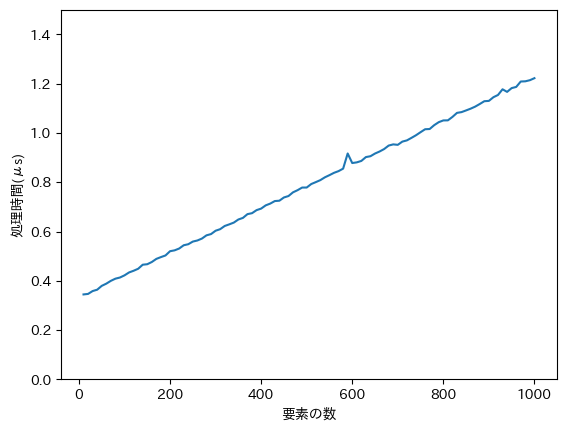

In [23]:
import japanize_matplotlib
import numpy as np
import timeit
from statistics import mean
import matplotlib.pyplot as plt

number = 1000000
repeat = 7
sizelist = []
timelist = []
for size in range(10, 1001, 10):
    ndarray = np.zeros((size, ))
    stmt = "np.count_nonzero(ndarray)"
    result = timeit.repeat(stmt=stmt, number=number, repeat=repeat, globals=locals())
    result = [time / number * 1000000 for time in result]
    sizelist.append(size)
    timelist.append(mean(result))
    
plt.ylabel("処理時間(μs)")
plt.xlabel("要素の数")
plt.ylim(0, 1.5)
plt.plot(sizelist, timelist)